In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
import matplotlib

plt.rc('text',usetex=True)
#font = {'family':'serif','size':16}
font = {'family':'serif','size':16, 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rc('legend',**{'fontsize':14})
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


In [3]:
BATS_ctd_raw_data = sio.loadmat('/Users/doddridge/Documents/Edward/Research/datasets/observations/BATS/ctd_data.mat')

File contains 2dbar downcast CTD data whereby all casts are in single cruise file.

Data format as follows:

col1: 8 digit cast_ID 	
     $XXXX###  where,

	$= cruise type
	1=bats core
	2=bats bloom a
	3=bats bloom b
 	5=bats validation
	XXXX= cruise number
	### = cast number

eg.	10155005  = bats core cruise, cruise 155, cast 5

    col2:   decimal year 
    col3: 	Latitude (N)
    col4: 	Longitude (W)
    col5:	Pressure (dbar)
    col6:	Depth (m)
    col7:	Temperature (ITS-90, C)
    col8:	Conductivity (S/m)
    col9:	Salinity (PSS-78)
    col10:	Dissolved Oxygen (umol/kg)
    col11:	Beam Attenuation Coefficient (1/m)
    col12:	Fluorescence (relative fluorescence units)
    
#### NB: Don't get confused with python's zero indexing!

In [4]:
BATS_CTD_data_dict = {}
BATS_CTD_data_dict['cast_ID'] = BATS_ctd_raw_data['ctd_data'][:,0]
BATS_CTD_data_dict['decimal_year'] = BATS_ctd_raw_data['ctd_data'][:,1]
BATS_CTD_data_dict['latitude'] = BATS_ctd_raw_data['ctd_data'][:,2]
BATS_CTD_data_dict['longitude'] = BATS_ctd_raw_data['ctd_data'][:,3]
BATS_CTD_data_dict['pressure'] = BATS_ctd_raw_data['ctd_data'][:,4]
BATS_CTD_data_dict['depth'] = BATS_ctd_raw_data['ctd_data'][:,5]
BATS_CTD_data_dict['temperature'] = BATS_ctd_raw_data['ctd_data'][:,6]
BATS_CTD_data_dict['conductivity'] = BATS_ctd_raw_data['ctd_data'][:,7]
BATS_CTD_data_dict['salinity'] = BATS_ctd_raw_data['ctd_data'][:,8]
BATS_CTD_data_dict['dissolved oxygen'] = BATS_ctd_raw_data['ctd_data'][:,9]
BATS_CTD_data_dict['beam attenuation coefficient'] = BATS_ctd_raw_data['ctd_data'][:,10]
BATS_CTD_data_dict['flourescence'] = BATS_ctd_raw_data['ctd_data'][:,11]


In [5]:
BATS_ctd_raw_data['ctd_data'][:100,10]

array([ 0.438,  0.438,  0.438,  0.438,  0.438,  0.438,  0.438,  0.438,
        0.441,  0.438,  0.44 ,  0.442,  0.442,  0.439,  0.437,  0.441,
        0.439,  0.439,  0.438,  0.439,  0.437,  0.438,  0.438,  0.438,
        0.438,  0.438,  0.438,  0.439,  0.438,  0.438,  0.44 ,  0.445,
        0.446,  0.446,  0.446,  0.446,  0.449,  0.442,  0.438,  0.438,
        0.438,  0.436,  0.434,  0.433,  0.435,  0.438,  0.433,  0.429,
        0.429,  0.425,  0.425,  0.423,  0.42 ,  0.416,  0.416,  0.414,
        0.413,  0.416,  0.416,  0.416,  0.416,  0.412,  0.411,  0.411,
        0.41 ,  0.41 ,  0.411,  0.409,  0.409,  0.407,  0.407,  0.407,
        0.408,  0.407,  0.407,  0.407,  0.407,  0.407,  0.407,  0.407,
        0.407,  0.407,  0.407,  0.407,  0.407,  0.407,  0.407,  0.407,
        0.407,  0.407,  0.407,  0.404,  0.406,  0.407,  0.405,  0.403,
        0.403,  0.406,  0.407,  0.406])

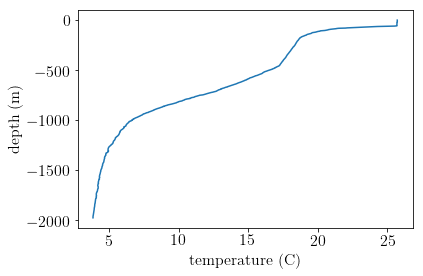

In [6]:
plt.plot(BATS_ctd_raw_data['ctd_data'][:1000,6], -BATS_ctd_raw_data['ctd_data'][:1000,5])
plt.ylabel('depth (m)')
plt.xlabel('temperature (C)')

In [7]:
BATS_ctd_data = pd.DataFrame(BATS_CTD_data_dict)

In [8]:
BATS_ctd_data[BATS_ctd_data['cast_ID']==10001001].head()

,beam attenuation coefficient,cast_ID,conductivity,decimal_year,depth,dissolved oxygen,flourescence,latitude,longitude,pressure,salinity,temperature
0,0.438,10001001.0,5.572947,1988.802568,3.972169,205.99,NaN,31.783,64.116,4.0,36.407,25.708
1,0.438,10001001.0,5.573360,1988.802568,5.958224,207.11,NaN,31.783,64.116,6.0,36.407,25.711
2,0.438,10001001.0,5.573611,1988.802568,7.944261,207.69,NaN,31.783,64.116,8.0,36.409,25.710
3,0.438,10001001.0,5.574106,1988.802568,9.930278,207.74,NaN,31.783,64.116,10.0,36.408,25.715
4,0.438,10001001.0,5.574194,1988.802568,11.916275,208.31,NaN,31.783,64.116,12.0,36.408,25.715


In [9]:
def d_dz(cast_ID, variable):
    
    d_dz = -(BATS_ctd_data.loc[BATS_ctd_data['cast_ID'] == cast_ID][variable].diff(periods=2)/
                   BATS_ctd_data.loc[BATS_ctd_data['cast_ID'] == cast_ID]['depth'].diff(periods=2))
    return d_dz
    

In [10]:
def running_mean(vector, win_length, symmetry='even'):
    """Calculate running mean. Edges are dealt with by 
    reflecting the vector values around the end point 
    and calculating the mean. win_length must be odd.
    
    Parameters
     - vector: the vector to be smoothed
     - win_length: the length of the smoothing window
     - symmetry: controls the behaviour at the ends of the input vector. 
     Is the function even, symmetry='even', or odd, symmetry='odd'. Default is "even".
    """
    
    if symmetry == 'even':
        sym = 1.
    elif symmetry == 'odd':
        sym = -1.
    else:
        raise ValueError('symmetry must be either "even" or "odd".')
        return
    
    if np.mod(win_length,2) != 1:
        raise ValueError("win_length must be odd")
        return
    
    vector_extended = np.append(vector,sym*vector[-1:-win_length:-1]) # add to the end
    vector_extended = np.insert(vector_extended,0,sym*vector[win_length:0:-1],) # add to the beginning
    
    vector_smoothed = np.zeros_like(vector)
    for i in xrange(len(vector)):
        vector_smoothed[i] = np.nanmean(vector_extended[win_length+i-(win_length+1)/2:win_length+i+(win_length+1)/2+1])
    
    return vector_smoothed

In [11]:
def trapezoidal_integration(array, axis, verbose=False):
    """Use the trapezoidal rule to numerically integrate the supplied array. The axis array must also be supplied.
    
    Can handle isolated masked values in array, and will fill by linear interpolation. 
    Multiple masked values next to each other will result in an error."""
    
    try:
        masked_inds = np.where(array.mask)[0]
        all_inds = np.arange(len(array))
        #print masked_inds
        #print all_inds
        #print all_inds[min(masked_inds):]
        
        if masked_inds.size == 0:
            # no elements are masked
            pass
        elif masked_inds.size == len(array):
            # all elemtents are masked. return NaN
            return np.nan
        elif np.array_equal(all_inds[min(masked_inds):], masked_inds):
            if verbose:
                print 'all indicies beyond a certain point are masked - removing masked region with indicies {0}'.format(masked_inds)
            array = array[:min(masked_inds)]
            axis = axis[:min(masked_inds)]
        elif np.array_equal(all_inds[:max(masked_inds)], masked_inds):
            if verbose:
                print 'all indicies up to a certain point are masked - removing masked region with indicies {0}'.format(masked_inds)
            array = array[max(masked_inds)+1:]
            axis = axis[max(masked_inds)+1:]
        else:
            # some elements are masked, but they do not form a contiguous block at either end of the input array
            pass
        
        #recalculate masked_inds with shortened inputs
        masked_inds = np.where(array.mask)[0]
        array_filled = copy.deepcopy(array)            
        # this prevents the filled array from propagating out of the function.
        for i in masked_inds:
            if i == 0:
                # first element is masked - copy second
                array_filled[i] = array[i+1]
            elif i == len(array)-1:
                # final element is copy penultimate
                array_filled[i] = array[i-1]
            else:
                array_filled[i] = (array[i-1] + array[i+1])/2.
    except AttributeError:
        # this captures the error if the input is not a numpy masked array.
        array_filled = copy.deepcopy(array)
    
    integral = 0.
    
    for i in xrange(len(array_filled)-1):
        integral += 0.5*(axis[i+1] - axis[i])*(array_filled[i+1] + array_filled[i])
        
    try:
        if integral.compressed().size == 0:
            integral = np.nan
    except AttributeError:
        pass
    
    return integral

def test_trap_integration():
    array = np.arange(10.)
    axis = np.arange(10.)

    integral = trapezoidal_integration(array, axis)
    
    assert integral == 40.5

def test_trap_integration_masked():
    array = np.arange(10.)
    array = np.ma.masked_where(array==5, array)
    axis = np.arange(10.)

    integral = trapezoidal_integration(array, axis)
    
    assert integral == 40.5

def test_trap_integration_masked_tail():
    array = np.arange(10.)
    array = np.ma.masked_where(array>=5., array)
    axis = np.arange(10.)
    #print array
    integral = trapezoidal_integration(array, axis)
    #print integral
    assert integral == 8

In [12]:
test_trap_integration()
test_trap_integration_masked()
test_trap_integration_masked_tail()

In [13]:
array = np.arange(10.)
array = np.ma.masked_where(array==5., array)
array = np.ma.masked_where(array==4., array)
axis = np.arange(10.)

test = trapezoidal_integration(array, axis)


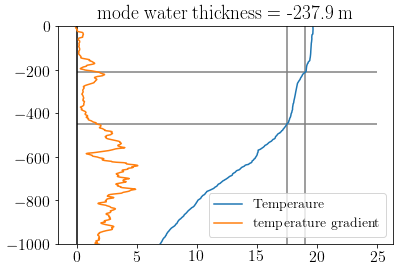

In [16]:
i=5048
plt.plot(BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['temperature'],
         -BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['depth'], label='Temperaure')

plt.plot(150.*running_mean(d_dz(BATS_ctd_data.cast_ID.unique()[i], 'temperature'),11), 
         -BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['depth'],
         label='temperature gradient')

index_19 = np.argmin(
        np.abs(BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['temperature']-19))
index_17_5 = np.argmin(
        np.abs(BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['temperature']-17.5))

plt.hlines([-BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['depth'][index_19],
            -BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['depth'][index_17_5]],
           0,25, color='grey')

mode_thickness = (BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['depth'][index_19] -
            BATS_ctd_data[BATS_ctd_data['cast_ID']==BATS_ctd_data.cast_ID.unique()[i]]['depth'][index_17_5])

plt.legend()
plt.vlines([0],-2000,0)
plt.vlines([17.5, 19],-2000,0, color='grey')
plt.ylim(-1000, 0)
plt.title('mode water thickness = {:3.1f} m'.format(mode_thickness))

In [17]:
BATS_data = pd.read_table('/Users/doddridge/Documents/Edward/Research/datasets/observations/BATS/bats_production.dat',
              skiprows=38,header=None,
              names=['ID','yymmdd','decimal year','Latitude','Longitude','Collection depth (m)','Incubation depth (m)','salt',
                                            'lt1','lt2','lt3','dark','t0','pp','thy1','thy2','thy3','thy'],
              delim_whitespace=True,
             )
BATS_data['pp'] = BATS_data['pp'].mask(BATS_data['pp'] == -9.99,)

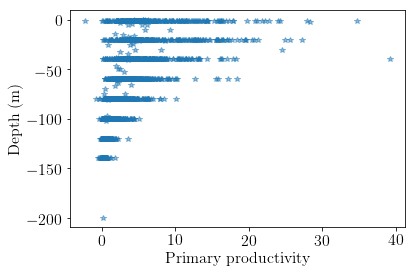

In [19]:
plt.plot(BATS_data['pp'],-BATS_data['Collection depth (m)'],'*',alpha=0.5)
plt.ylabel('Depth (m)')
plt.xlabel('Primary productivity')

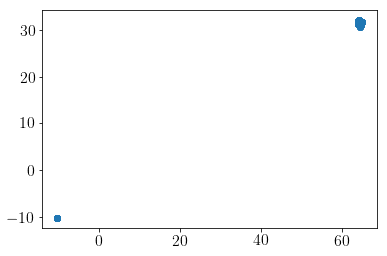

In [20]:
plt.plot(BATS_data['Longitude'], BATS_data['Latitude'], 'o')

# combine data into single dataframe

Go through each primary productivity estimate, integrate vertically, and then look for ctd casts that:
 - happen within $\pm$ $X$ days of the productivity sampling
 - are within $Y$ km of the productivity data

In [21]:
combined_data = pd.DataFrame(columns=['pp_yyyymmdd', 'pp_decimal_year', 'ctd_decimal_year', 
                                      'pp_integrated', 'mode_water_top', 'mode_water_bottom',
                                      'mode_water_thickness', 'pp_lat', 'pp_lng', 
                                      'ctd_lat', 'ctd_lng', 'distance'])

# loop through BATS primary productivity data
pp_integrated = np.zeros(BATS_data.yymmdd.unique().shape)
mode_water_thickness = np.zeros(BATS_data.yymmdd.unique().shape)

for counter, day in enumerate(BATS_data.yymmdd.unique()):
    one_day_subset = BATS_data.loc[BATS_data['yymmdd'] == day]
    combined_data.set_value(counter, 'pp_yyyymmdd', day)
    combined_data.set_value(counter, 'pp_decimal_year', np.array(one_day_subset['decimal year'])[0])
    combined_data.set_value(counter, 'pp_lat', np.array(one_day_subset['Latitude'])[0])
    combined_data.set_value(counter, 'pp_lng', np.array(one_day_subset['Longitude'])[0])
    
    # calculate vertically integrated primary productivity for this day
    # if all pp data are NaN, then the output should be too
    combined_data['pp_integrated'][counter] = trapezoidal_integration(np.ma.masked_where(np.isnan(one_day_subset['pp']),
                                                                        one_day_subset['pp']), 
                                                     np.array(one_day_subset['Collection depth (m)']))
    
    # find ctd casts within +/- X days
    X = 1.
    ctd_subset = BATS_ctd_data.loc[np.abs(BATS_ctd_data['decimal_year'] - 
                                          np.array(one_day_subset['decimal year'])[0]) < .002739726*X]
    
    # extract mode water thickness from each one
    
    if ctd_subset['decimal_year'].unique().shape[0] == 0:
        # no ctd casts found within +/- X days
        combined_data.set_value(counter, 'mode_water_top', np.nan)
        combined_data.set_value(counter, 'mode_water_bottom', np.nan)
        combined_data.set_value(counter, 'mode_water_thickness', np.nan)
        combined_data.set_value(counter, 'ctd_decimal_year', np.nan)
        combined_data.set_value(counter, 'ctd_lat', np.nan)
        combined_data.set_value(counter, 'ctd_lng', np.nan)
        
    else:
        # at least one cast has been found
        top = []
        bottom = []
        thickness = []
        lats = []
        lngs = []
        decimal_years = []
        distance = []
        
        
        for date_stamp in ctd_subset['decimal_year'].unique():
            # go through the casts and check if they are within Y km of the productivity measurements
            delta_x = (60.*1.85*np.cos(combined_data['pp_lat'][counter]*np.pi/180.)*
                        (combined_data['pp_lat'][counter] - np.array(
                            ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['latitude'])[0]))
            delta_y = (60.*1.85*
                       (combined_data['pp_lng'][counter] - np.array(
                            ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['longitude'])[0]))
            
            # check it is within Y km of pp measurements
            Y = 50.
            if np.sqrt(delta_x**2 + delta_y**2) < Y:
                distance.append(np.sqrt(delta_x**2 + delta_y**2))
                if all(np.isnan(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['temperature'])):
                    # if all temperature measurements are NaN, then there's nothing to be done
                    top.append(np.nan)
                    bottom.append(np.nan)
                    thickness.append(np.nan)
                    lats.append(np.array(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['latitude'])[0])
                    lngs.append(np.array(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['longitude'])[0])
                    decimal_years.append(np.array(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['decimal_year'])[0])
                else:
                    index_19 = np.argmin(
                            np.abs(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['temperature']-19))
                    index_17_5 = np.argmin(
                            np.abs(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['temperature']-17.5))

                    top.append(ctd_subset.loc[ctd_subset['decimal_year']==date_stamp]['depth'][index_19])
                    bottom.append(ctd_subset.loc[ctd_subset['decimal_year']==date_stamp]['depth'][index_17_5])
                    thickness.append((ctd_subset.loc[ctd_subset['decimal_year']==date_stamp]['depth'][index_17_5] -
                                ctd_subset.loc[ctd_subset['decimal_year']==date_stamp]['depth'][index_19]))
                    lats.append(np.array(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['latitude'])[0])
                    lngs.append(np.array(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['longitude'])[0])
                    decimal_years.append(np.array(ctd_subset.loc[ctd_subset['decimal_year'] == date_stamp]['decimal_year'])[0])

            else:
                # the cast wasn't close enough, so ignore it.
                pass
    
        combined_data.set_value(counter, 'mode_water_top', np.nanmean(top))
        combined_data.set_value(counter, 'mode_water_bottom', np.nanmean(bottom))
        combined_data.set_value(counter, 'mode_water_thickness', np.nanmean(thickness))
        combined_data.set_value(counter, 'ctd_decimal_year', decimal_years)
        combined_data.set_value(counter, 'ctd_lat', lats)
        combined_data.set_value(counter, 'ctd_lng', lngs)
        combined_data.set_value(counter, 'distance', distance)


/Users/doddridge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Mean of empty slice
/Users/doddridge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Mean of empty slice
/Users/doddridge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Mean of empty slice


In [22]:
combined_data[:5]

,pp_yyyymmdd,pp_decimal_year,ctd_decimal_year,pp_integrated,mode_water_top,mode_water_bottom,mode_water_thickness,pp_lat,pp_lng,ctd_lat,ctd_lng,distance
0,19881218,1988.96,"[1988.964888, 1988.965535, 1988.966041, 1988.9...",281.6,154.462,287.379,132.917,31.669,64.049,"[31.668, 31.687, 31.683, 31.675, 31.776]","[64.043, 64.02, 64.017, 63.972, 64.056]","[0.672666989635, 3.64055240024, 3.79024804909,..."
1,19890127,1989.07,"[1989.072137, 1989.073139, 1989.075571]",181.415,149.896,265.269,115.372,31.695,64.252,"[31.69, 31.634, 31.655]","[64.251, 64.141, 64.253]","[0.485095898309, 13.6013940105, 3.77943526941]"
2,19890219,1989.14,"[1989.135055, 1989.135902, 1989.138413]",768.805,261.669,345.273,83.6039,31.65,64.522,"[31.65, 31.709, 31.703]","[64.551, 64.605, 64.835]","[3.219, 10.7684530391, 35.1020838256]"
3,19890326,1989.23,[],194.795,NaN,NaN,NaN,31.135,64.751,[],[],[]
4,19890417,1989.29,"[1989.291457, 1989.292256, 1989.294235]",193.085,166.437,294.062,127.624,31.587,64.213,"[31.574, 31.554, 31.509]","[64.208, 64.235, 64.254]","[1.34869967211, 3.96228542489, 8.66639313667]"


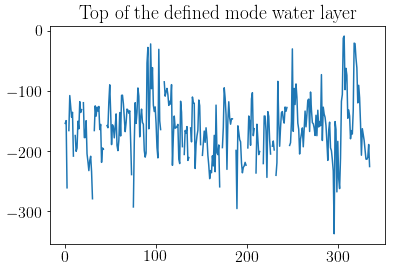

In [23]:
# how close to the surface does the defined mode water layer get?

plt.plot(-combined_data['mode_water_top'])
plt.title('Top of the defined mode water layer')

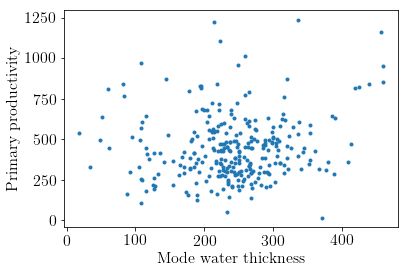

In [24]:
# scatterplot of mode water thickness against primary productivity

plt.plot(combined_data['mode_water_thickness'], combined_data['pp_integrated'], '.')
plt.ylabel('Primary productivity')
plt.xlabel('Mode water thickness')

In [25]:
pp_integrated = np.array(combined_data['pp_integrated'], dtype=np.float64)
mode_water_thickness = np.array(combined_data['mode_water_thickness'], dtype=np.float64)

mask = np.zeros(pp_integrated.shape)
mask[np.isnan(pp_integrated)] = 1
mask[np.isnan(mode_water_thickness)] = 1
mask[pp_integrated == 0] = 1

pp_integrated = np.ma.masked_where(mask == 1, pp_integrated)
mode_water_thickness = np.ma.masked_where(mask == 1, mode_water_thickness)


In [26]:
import scipy.stats

In [27]:
scipy.stats.linregress((mode_water_thickness.compressed()), (pp_integrated.compressed()))

LinregressResult(slope=0.33161242042621009, intercept=366.05891783569132, rvalue=0.12557129376391846, pvalue=0.033465592324596907, stderr=0.15519105916097273)

In [28]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress((mode_water_thickness.compressed()), (pp_integrated.compressed()))

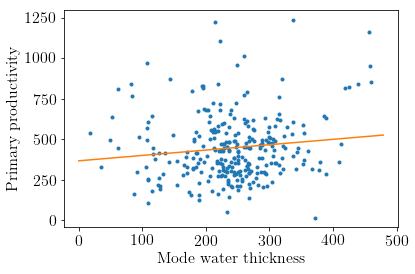

In [29]:
plt.plot(mode_water_thickness, pp_integrated, '.')
plt.plot(intercept + slope*np.arange(480.))
plt.ylabel('Primary productivity')
plt.xlabel('Mode water thickness')

In [30]:
comb_dropped_nulls = combined_data[pd.notnull(combined_data['mode_water_thickness'])]

In [31]:
comb_dropped_nulls[:5]

,pp_yyyymmdd,pp_decimal_year,ctd_decimal_year,pp_integrated,mode_water_top,mode_water_bottom,mode_water_thickness,pp_lat,pp_lng,ctd_lat,ctd_lng,distance
0,19881218,1988.96,"[1988.964888, 1988.965535, 1988.966041, 1988.9...",281.6,154.462,287.379,132.917,31.669,64.049,"[31.668, 31.687, 31.683, 31.675, 31.776]","[64.043, 64.02, 64.017, 63.972, 64.056]","[0.672666989635, 3.64055240024, 3.79024804909,..."
1,19890127,1989.07,"[1989.072137, 1989.073139, 1989.075571]",181.415,149.896,265.269,115.372,31.695,64.252,"[31.69, 31.634, 31.655]","[64.251, 64.141, 64.253]","[0.485095898309, 13.6013940105, 3.77943526941]"
2,19890219,1989.14,"[1989.135055, 1989.135902, 1989.138413]",768.805,261.669,345.273,83.6039,31.65,64.522,"[31.65, 31.709, 31.703]","[64.551, 64.605, 64.835]","[3.219, 10.7684530391, 35.1020838256]"
4,19890417,1989.29,"[1989.291457, 1989.292256, 1989.294235]",193.085,166.437,294.062,127.624,31.587,64.213,"[31.574, 31.554, 31.509]","[64.208, 64.235, 64.254]","[1.34869967211, 3.96228542489, 8.66639313667]"
5,19890516,1989.37,"[1989.370928, 1989.373697, 1989.374486, 1989.3...",151.67,108.212,284.303,176.091,31.963,64.033,"[31.963, 32.032, 32.05, 32.079]","[64.032, 63.787, 63.73, 63.668]","[0.111000000001, 28.0684752071, 34.6165040974,..."


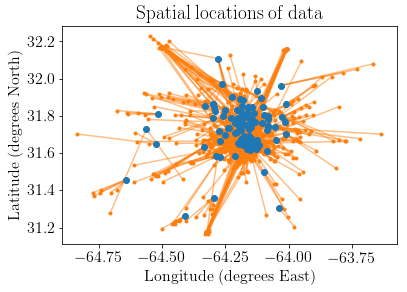

In [32]:
# plt.figure(figsize = (10,10))
# m.drawcoastlines()
# m.drawmeridians(np.arange(-90,0,1),labels=[False,False,True,True],fontsize=20)
# m.drawparallels(np.arange(-10,40,1),labels=[True,False,False,False],fontsize=20)

for ind in comb_dropped_nulls.index[:]:
    pp_lng = -1.*comb_dropped_nulls.get_value(ind, 'pp_lng')
    pp_lat = comb_dropped_nulls.get_value(ind, 'pp_lat')
    ctd_lngs = comb_dropped_nulls.get_value(ind, 'ctd_lng')
    ctd_lats = comb_dropped_nulls.get_value(ind, 'ctd_lat')
    plt.plot(pp_lng, pp_lat, 'o', color='C0', zorder=3)#, latlon=True)
    
    for cast in xrange(len(ctd_lngs)):
        plt.plot([pp_lng, -1.*ctd_lngs[cast]], [pp_lat, ctd_lats[cast]], '-', color='C1', alpha=0.5)#, latlon=True)
        plt.plot(-1.*ctd_lngs[cast], [ctd_lats[cast]], '.', color='C1')#, latlon=True)
        
plt.title('Spatial locations of data')
plt.xlabel('Longitude (degrees East)')
plt.ylabel('Latitude (degrees North)')

# Annual averages

This is good, but let's look at annual averages, since the mechanism is meant to be an equilibrium one.

In [33]:
ann_avg_comb_data = pd.DataFrame(columns=['pp', 'mode_water_thickness'])

In [34]:
for year in xrange(1988,2016):
    year_subset = comb_dropped_nulls.loc[np.abs(comb_dropped_nulls['pp_decimal_year'] - (year + 0.5)) < 0.5]
    ann_avg_comb_data.set_value(year, 'pp', year_subset['pp_integrated'].mean())
    ann_avg_comb_data.set_value(year, 'mode_water_thickness', year_subset['mode_water_thickness'].mean())
    

In [35]:
ann_avg_comb_data

,pp,mode_water_thickness
1988,281.6,132.917
1989,297.672,150.117
1990,384.213,147.46
1991,439.742,140.588
1992,469.22,141.445
1993,409.301,182.13
1994,321.981,270.812
1995,488.484,324.817
1996,498.866,304.754
1997,428.132,262.865


In [46]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress((mode_water_thickness.compressed()), (pp_integrated.compressed()))

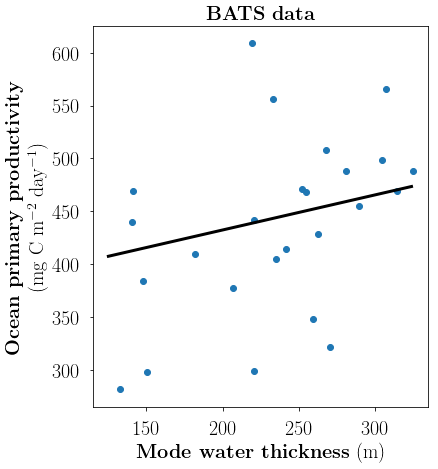

In [47]:
plt.figure(figsize=(6,7))
plt.plot(ann_avg_comb_data['mode_water_thickness'], ann_avg_comb_data['pp'], 'o')
plt.plot(np.arange(125.,325.), intercept + slope*np.arange(125., 325.), 'k', linewidth=3)
plt.xlabel(r'\textbf{Mode water thickness} (m)', fontsize=20)
plt.ylabel('\\textbf{Ocean primary productivity} \n (mg C m$^{-2}$ day$^{-1}$)',fontsize=20)
plt.title(r'\textbf{BATS data}', fontsize=20)
plt.tick_params(pad=10,axis='both', labelsize=20)

plt.savefig('BATS_annual.pdf', bbox_inches='tight')